# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
LEARNING_RATE = [0.01,0.001,0.0001]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9

In [10]:
results = {}
for opt in ['SGD', 'RMSprop', 'AdaGrad', 'Adam']:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    if opt == 'SGD':
        optimizer = keras.optimizers.SGD()
    elif opt == 'RMSprop':
        optimizer = keras.optimizers.RMSprop()
    elif opt == 'AdaGrad':
        optimizer = keras.optimizers.Adagrad()
    else:
        optimizer = keras.optimizers.Adam()
    
    print("Experiment with optimizer", opt)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-optimizer-{opt}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 3,837,066
Trainable params: 3,837,066
Non-trainable para

Epoch 47/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.1523 - acc: 0.5972 - val_loss: 1.5680 - val_acc: 0.4706
Epoch 48/50
50000/50000 [==============================] - 16s 317us/step - loss: 1.1543 - acc: 0.5965 - val_loss: 1.4621 - val_acc: 0.4792
Epoch 49/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.1433 - acc: 0.5980 - val_loss: 1.4309 - val_acc: 0.5030
Epoch 50/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.1346 - acc: 0.6021 - val_loss: 1.3974 - val_acc: 0.5067
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)    

Epoch 47/50
50000/50000 [==============================] - 17s 345us/step - loss: 0.6501 - acc: 0.7677 - val_loss: 2.3915 - val_acc: 0.4877
Epoch 48/50
50000/50000 [==============================] - 17s 348us/step - loss: 0.6291 - acc: 0.7758 - val_loss: 2.8154 - val_acc: 0.4856
Epoch 49/50
50000/50000 [==============================] - 17s 344us/step - loss: 0.6261 - acc: 0.7770 - val_loss: 2.6719 - val_acc: 0.4515
Epoch 50/50
50000/50000 [==============================] - 17s 345us/step - loss: 0.6174 - acc: 0.7809 - val_loss: 2.4205 - val_acc: 0.4779
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)    

50000/50000 [==============================] - 17s 334us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 17s 334us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 17s 335us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 17s 336us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 17s 334us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 10

Epoch 46/50
50000/50000 [==============================] - 18s 363us/step - loss: 0.4364 - acc: 0.8435 - val_loss: 2.2299 - val_acc: 0.5144
Epoch 47/50
50000/50000 [==============================] - 18s 362us/step - loss: 0.4226 - acc: 0.8482 - val_loss: 2.3125 - val_acc: 0.5133
Epoch 48/50
50000/50000 [==============================] - 18s 362us/step - loss: 0.4239 - acc: 0.8463 - val_loss: 2.3423 - val_acc: 0.5058
Epoch 49/50
50000/50000 [==============================] - 18s 362us/step - loss: 0.3843 - acc: 0.8626 - val_loss: 2.3786 - val_acc: 0.5194
Epoch 50/50
50000/50000 [==============================] - 18s 362us/step - loss: 0.3918 - acc: 0.8597 - val_loss: 2.5002 - val_acc: 0.5020


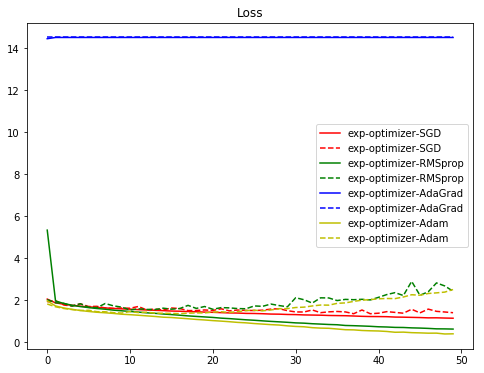

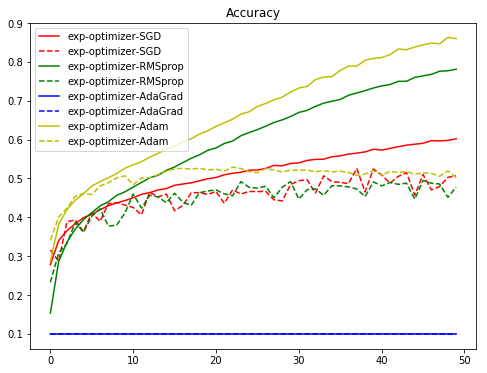

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"] #, "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()